# 컴퓨터정보공학과 3학년 A반 장동건 빅데이터 프로젝트
---

## 미국 금리 변동과 한국 경제 및 부동산 시장의 관계 분석

미국 금리 변동은 전 세계 경제에 중요한 영향을 미치며, 특히 한국 경제에 더 큰 영향을 미칩니다. 미국의 금리는 국제 금융시장에서 중요한 기준금리로 작용하며, 이는 한국의 금리 정책에도 영향을 미칠 수 있습니다. 미국 금리가 상승하면 일반적으로 글로벌 자금 흐름에 변동이 생기고, 한국을 포함한 다른 국가들은 이에 대응하기 위해 금리를 조정하기도 합니다. 따라서 미국 금리의 변동은 한국의 기준 금리에 직간접적으로 영향을 미칠 가능성이 큽니다.


한국 금리는 주택 시장, 기업의 투자 결정, 소비자 대출금리에 중요한 영향을 미칩니다. 특히 부동산 시장에서의 금리 변동은 매우 중요한 변수입니다. 금리가 상승하면 대출 이자 부담이 커지면서 소비자들이 주택 구매를 꺼리게 되고, 이는 부동산 가격에 부정적인 영향을 미칠 수 있습니다.반대로 금리가 하락하면 대출이 용이해져 부동산 가격이 상승하는 경향이 나타날 수 있습니다.


이처럼 금리는 부동산 시장에서 중요한 역할을 하며, 금리 변화에 따른 가격 변동을 예측하고, 미국 금리가 한국 금리에 미치는 영향을 분석하는 것과 한국 금리가 한국 부동산 시장에 미치는 영향을 분석하고 금리 변동과 부동산 시장의 관계를 규명하여 미래의 금리 변화에 대응할 수 있는 전략을 수립 할 수 있도록 프로젝트를 진행합니다.

---


In [38]:
!pip install fredapi
from fredapi import Fred

미국의 기준금리를 불러오기 위해 fredapi를 설치차여 라이브러리를 불러옵니다.

In [39]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


드라이브에 저장된 CSV 데이터셋을 불러오기 위해 drive mount를 진행합니다.

## <2> 데이터 변환


In [40]:
import pandas as pd

# 주택 가격 데이터 로드
housing_data = pd.read_csv('/content/drive/MyDrive/한국부동산원_전국주택가격동향조사_월별동향_아파트_매매가격(평균매매가격)_20240630.csv', encoding='euc-kr')
df_housing = pd.DataFrame(housing_data)
housing_data_convert = df_housing.iloc[7:8]
# print(housing_data_convert)
print("\n")

# 한국 기준 금리 데이터 로드
korean_interest_data = pd.read_csv('/content/drive/MyDrive/한국은행 기준금리 및 여수신금리_23101006.csv')
df_korean_interest = pd.DataFrame(korean_interest_data)
korean_interest_data_convert = df_korean_interest.iloc[0:1]
# print(korean_interest_data_convert)
print("\n")

# 미국 기준 금리 데이터 로드
from fredapi import Fred
fred = Fred(api_key='6aa3ad2c53508c5e5cdff085f742f458')
us_interest_data = fred.get_series('DFEDTARU')  # 미국 기준 금리 데이터
us_interest_data = us_interest_data.reset_index()
us_interest_data.columns = ['Date', 'US_Interest_Rate']
# print(us_interest_data)
print('\n')

# 1. 주택 가격 데이터에서 날짜 열을 'Date'로 변환
df_housing_convert = housing_data_convert.melt(id_vars=['지역'], var_name='Date', value_name='Housing_Price')
df_housing_convert['Date'] = pd.to_datetime(df_housing_convert['Date'], format='%Y-%m').dt.to_period('M')
print(df_housing_convert)
print('\n')

# 2. 한국 기준 금리 데이터에서 날짜 열을 'Date'로 변환
df_korean_interest = korean_interest_data_convert.melt(id_vars=['통계표', '코드(계정항목)', '계정항목', '단위', '변환'], var_name='Date', value_name='Interest_Rate')
df_korean_interest['Date'] = pd.to_datetime(df_korean_interest['Date'], format='%Y/%m/%d').dt.to_period('M')
print(df_korean_interest)
print('\n')

# 3. 미국 기준 금리 데이터 날짜열을 'Date'로 변환
us_interest_data['Date'] = pd.to_datetime(us_interest_data['Date']).dt.to_period('M')
print(us_interest_data)
print('\n')










     지역     Date  Housing_Price
0    서울  2012-01       540954.0
1    서울  2012-02       538876.0
2    서울  2012-03       536079.0
3    서울  2012-04       532409.0
4    서울  2012-05       529733.0
..   ..      ...            ...
145  서울  2024-02      1050926.0
146  서울  2024-03      1051339.0
147  서울  2024-04      1053752.0
148  서울  2024-05      1056975.0
149  서울  2024-06      1065067.0

[150 rows x 3 columns]


                           통계표  코드(계정항목)       계정항목  단위   변환     Date  \
0     1.3.1. 한국은행 기준금리 및 여수신금리    101000  한국은행 기준금리  연%  원자료  2012-01   
1     1.3.1. 한국은행 기준금리 및 여수신금리    101000  한국은행 기준금리  연%  원자료  2012-01   
2     1.3.1. 한국은행 기준금리 및 여수신금리    101000  한국은행 기준금리  연%  원자료  2012-01   
3     1.3.1. 한국은행 기준금리 및 여수신금리    101000  한국은행 기준금리  연%  원자료  2012-01   
4     1.3.1. 한국은행 기준금리 및 여수신금리    101000  한국은행 기준금리  연%  원자료  2012-01   
...                        ...       ...        ...  ..  ...      ...   
3138  1.3.1. 한국은행 기준금리 및 여수신금리    101000  한국은행 기준금리  연%  원자료  2024-09   


---
### 주택 가격 데이터
- `한국부동산원_전국주택가격동향조사_월별동향_아파트_매매가격(평균매매가격)_20240630.csv` 파일을 불러옵니다.
- 데이터프레임으로 변환 후 필요한 행만 (`iloc[7:8]`) 추출하여 처리합니다.
- 데이터를 `melt()` 함수를 사용해 날짜별 매매 가격 형식으로 변환합니다.

### 날짜 형식 변환
- `'Date'` 열을 추가하여 연-월(`%Y-%m`) 형식으로 변환 후, `Period` 타입으로 변경하여 월 단위로 정리합니다.

### 한국 기준 금리 데이터
- `한국은행 기준금리 및 여수신금리_23101006.csv` 파일을 불러옵니다.
- 데이터프레임으로 변환 후 필요한 행 (`iloc[0:1]`)을 추출합니다.
- 데이터를 `melt()` 함수를 사용해 날짜별 기준 금리 형식으로 변환합니다.

### 날짜 형식 변환
- `'Date'` 열을 추가하여 연/월/일(`%Y/%m/%d`) 형식으로 변환 후, `Period` 타입으로 변경하여 월 단위로 정리합니다.

### 미국 기준 금리 데이터 (`us_interest_data`):
- FRED API를 사용해 미국 기준 금리 데이터 (`DFEDTARU` 시리즈)를 불러옵니다.
- 데이터프레임으로 변환하여 날짜(`Date`)와 금리(`US_Interest_Rate`) 열로 구성합니다.

### 날짜 형식 변환
- `'Date'` 열을 연/월/일(`%Y-%m-%d`) 형식으로 변환 후, `Period` 타입으로 변경하여 월 단위로 정리합니다.

---

### 주택 가격 데이터 (`df_housing_convert`)
- `지역`, `Date`, `Housing_Price` 열로 구성된 데이터프레임으로, 각 지역별 월간 평균 매매 가격 정보를 포함합니다.

### 한국 기준 금리 데이터 (`df_korean_interest`)
- `통계표`, `계정항목`, `단위`, `변환`, `Date`, `Interest_Rate` 열로 구성된 데이터프레임으로, 월간 기준 금리 정보를 포함합니다.

### 미국 기준 금리 데이터 (`us_interest_data`)
- `Date`와 `US_Interest_Rate` 열로 구성된 데이터프레임으로, 월간 기준 금리 정보를 포함합니다.
---


## <2> 데이터 병합

In [41]:
# # 데이터 병합 (주택 가격, 한국 금리, 미국 금리)
merged_data = pd.merge(df_housing_convert, df_korean_interest[['Date', 'Interest_Rate']], on='Date', how='inner')
merged_data = pd.merge(merged_data, us_interest_data[['Date', 'US_Interest_Rate']], on='Date', how='inner')


# 결측값 처리 (예: 결측값을 전월 데이터로 대체)
merged_data.fillna(method='ffill', inplace=True)
print('\n')
print("\n최종 병합된 데이터:")
print(merged_data)
print('\n')
print(df_housing.columns)
print('\n')
print(df_korean_interest.columns)




최종 병합된 데이터:
       지역     Date  Housing_Price  Interest_Rate  US_Interest_Rate
0      서울  2012-01       540954.0           3.25              0.25
1      서울  2012-01       540954.0           3.25              0.25
2      서울  2012-01       540954.0           3.25              0.25
3      서울  2012-01       540954.0           3.25              0.25
4      서울  2012-01       540954.0           3.25              0.25
...    ..      ...            ...            ...               ...
94008  서울  2024-06      1065067.0           3.50              5.50
94009  서울  2024-06      1065067.0           3.50              5.50
94010  서울  2024-06      1065067.0           3.50              5.50
94011  서울  2024-06      1065067.0           3.50              5.50
94012  서울  2024-06      1065067.0           3.50              5.50

[94013 rows x 5 columns]


Index(['지역', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09',
       ...
       '2023-09', '2023

<ipython-input-41-af0e370faf0f>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)



## 데이터 병합 및 결측값 처리

### 1. 데이터 병합
주택 가격 데이터, 한국 기준 금리 데이터, 미국 기준 금리 데이터를 날짜(`Date`)를 기준으로 병합합니다.  
병합 과정은 두 단계로 이루어집니다:
1. **주택 가격 데이터 (`df_housing_convert`)**와 **한국 금리 데이터 (`df_korean_interest`)**를 `Date` 열을 기준으로 병합 (내부 병합, `how='inner'`).
2. 위에서 병합된 데이터와 **미국 금리 데이터 (`us_interest_data`)**를 다시 `Date` 열을 기준으로 병합.

병합된 데이터프레임은 주택 가격, 한국 금리, 미국 금리를 모두 포함하는 통합 데이터셋을 만듭니다.



### 2. 결측값 처리
- 병합 후 결측값이 발생할 수 있는 데이터에 대해 전월 데이터를 사용하여 채웁니다.
- `fillna(method='ffill')` 메서드를 사용하여 **결측값을 전방 채우기(Forward Fill)** 방식으로 처리합니다.



### 3. 결과 확인
#### 3.1 최종 병합된 데이터 출력
- 병합 후 결측값 처리가 완료된 최종 데이터셋을 출력하여 구조와 값을 확인합니다.

#### 3.2 열 이름 확인
- `df_housing`와 `df_korean_interest`의 열 이름을 출력하여 병합 대상 데이터의 컬럼 구조를 확인합니다.



### [피처간의 상관관계 탐색]

                  Housing_Price  Interest_Rate  US_Interest_Rate
Housing_Price          1.000000      -0.022382          0.569346
Interest_Rate         -0.022382       1.000000          0.560664
US_Interest_Rate       0.569346       0.560664          1.000000


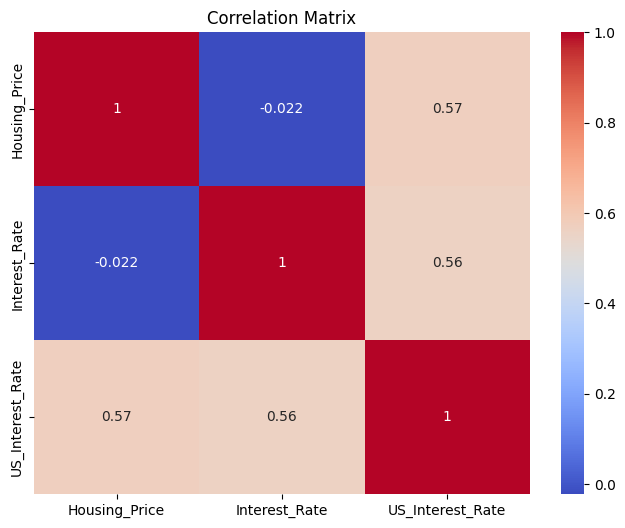

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns for correlation calculation
numeric_data = merged_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
print(corr_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## 상관관계 분석 및 시각화

### 1. 상관관계 계산
상관관계(Correlation)는 두 변수 간의 관계를 수치로 나타내며, -1에서 1 사이의 값을 가집니다. 상관계수는 다음과 같이 해석됩니다
- `1`: 두 변수 간에 완전한 양의 상관관계가 존재 (하나의 값이 증가하면 다른 값도 증가).
- `-1`: 두 변수 간에 완전한 음의 상관관계가 존재 (하나의 값이 증가하면 다른 값은 감소).
- `0`: 두 변수 간에 상관관계가 거의 없음.

코드에서는 다음을 수행합니다
1. `merged_data` 데이터프레임에서 숫자형 열만 선택합니다.
2. `corr()` 함수를 사용하여 상관관계 행렬을 계산합니다.

### 2. 상관관계 시각화
상관관계 행렬을 시각적으로 이해하기 쉽게 Seaborn의 `heatmap`을 사용하여 히트맵(Heatmap)으로 표현합니다
- 히트맵에서 색상은 상관계수의 강도를 나타냅니다.
  - 붉은색(`+1`에 가까운 값): 양의 상관관계.
  - 파란색(`-1`에 가까운 값): 음의 상관관계.
  - 흰색 또는 중간 색상: 약한 상관관계 또는 무관.
- 상관계수 값은 각 셀에 표시됩니다.



### [데이터 시각화]

<ipython-input-46-8e63ad56116e>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_data = numeric_data.resample('6M').mean()


Correlation matrix:
                   US_Interest_Rate  Interest_Rate  Housing_Price
US_Interest_Rate          1.000000       0.518283       0.595185
Interest_Rate             0.518283       1.000000      -0.040241
Housing_Price             0.595185      -0.040241       1.000000


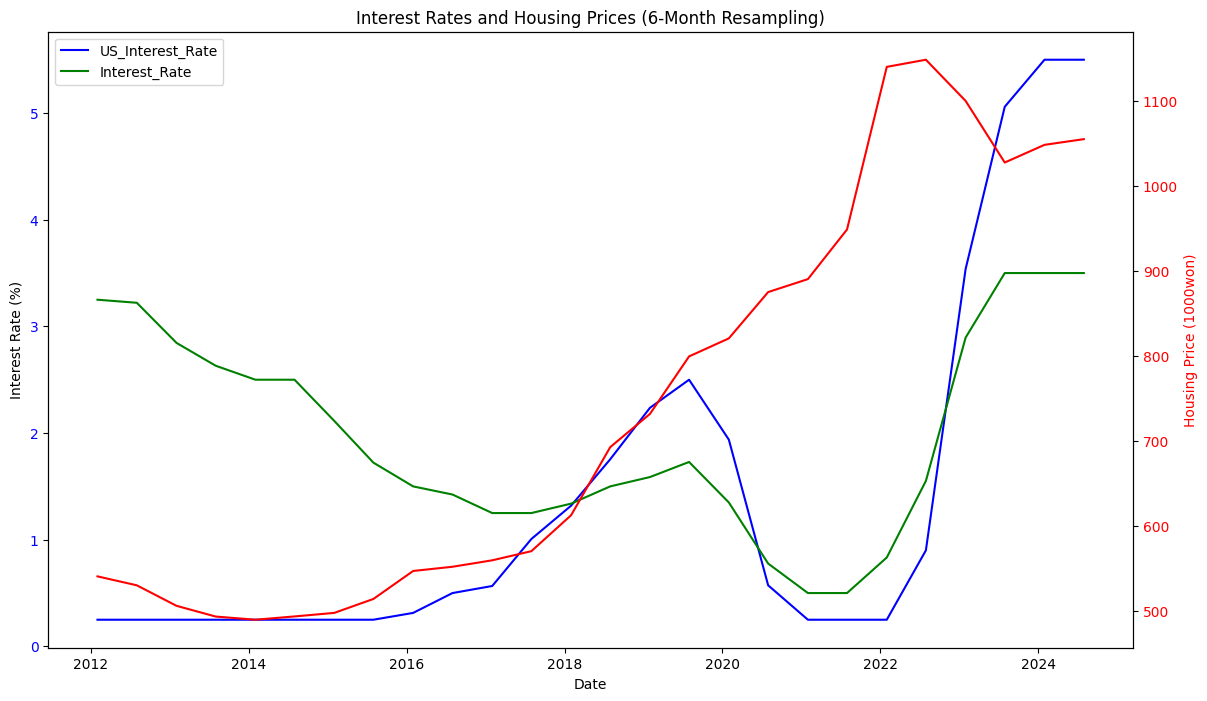

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Date'가 PeriodDtype인지 확인 후 변환
if merged_data['Date'].dtype.name.startswith('period'):
    merged_data['Date'] = merged_data['Date'].dt.to_timestamp()

# 'Date'를 인덱스로 설정
merged_data.set_index('Date', inplace=True)

numeric_data = merged_data.drop(columns=['지역'])

# 6개월 단위로 리샘플링하여 평균값을 계산
resampled_data = numeric_data.resample('6M').mean()

# 6개월 단위로 리샘플링된 데이터 상관관계 계산
corr_matrix = resampled_data[['US_Interest_Rate', 'Interest_Rate', 'Housing_Price']].corr()

# 상관관계 출력
print("Correlation matrix:\n", corr_matrix)

# 6개월 단위로 리샘플링된 데이터 시각화
plt.figure(figsize=(14, 8))

# 첫 번째 Y축 (금리)
ax1 = plt.gca()
ax1.plot(resampled_data.index, resampled_data['US_Interest_Rate'], label='US_Interest_Rate', color='blue')
ax1.plot(resampled_data.index, resampled_data['Interest_Rate'], label='Interest_Rate', color='green')
ax1.set_xlabel('Date')
ax1.set_ylabel('Interest Rate (%)')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# 두 번째 Y축 (주택 가격) - 한국 천원 단위
ax2 = ax1.twinx()
ax2.plot(resampled_data.index, resampled_data['Housing_Price'] / 1000, label='Housing Price', color='red')  # 천원 단위로 변환
ax2.set_ylabel('Housing Price (1000won)', color='red')  # Y축 레이블에 '천원' 단위 추가
ax2.tick_params(axis='y', labelcolor='red')

# 제목 및 레이블 설정
plt.title('Interest Rates and Housing Prices (6-Month Resampling)')
plt.show()






## 6개월 단위 리샘플링 및 상관관계 분석

### 1. 데이터 전처리
#### 1.1 `Date` 열 변환
- `Date` 열의 데이터 타입이 `Period` 형식인지 확인 후, `Timestamp` 형식으로 변환합니다.
- 데이터프레임에서 `Date` 열을 인덱스로 설정하여 시간 기반의 데이터 처리 및 리샘플링이 용이하도록 구성합니다.

#### 1.2 리샘플링
- 6개월 단위(`6M`)로 데이터를 리샘플링하여 평균값을 계산합니다.

---

### 2. 상관관계 계산
- 리샘플링된 데이터에서 미국 금리(`US_Interest_Rate`), 한국 금리(`Interest_Rate`), 주택 가격(`Housing_Price`) 간의 상관관계를 계산합니다.
- 상관계수 해석:
  - `US_Interest_Rate`와 `Housing_Price`의 상관계수는 **0.595**로, 양의 상관관계를 가집니다.
  - `Interest_Rate`와 `Housing_Price`의 상관계수는 **-0.04**로, 거의 관계가 없음을 나타냅니다.
  - `US_Interest_Rate`와 `Interest_Rate`는 **0.518**로, 중간 정도의 양의 상관관계를 보입니다.

---

### 3. 시각화
리샘플링된 데이터를 시각적으로 표현하여 금리와 주택 가격 간의 관계를 분석합니다.
#### 3.1 금리 시각화
- 첫 번째 Y축:
  - 미국 금리와 한국 금리를 각각 파란색과 초록색 선으로 표시합니다.
  - 금리의 변동 추이를 시계열 데이터로 시각화합니다.

#### 3.2 주택 가격 시각화
- 두 번째 Y축:
  - 주택 가격을 빨간색 선으로 표시합니다.
  - 금리 데이터와 함께 표시하여 두 변수 간의 관계를 비교할 수 있습니다.

#### 3.3 그래프 구성
- X축: 날짜(`Date`).
- 첫 번째 Y축: 금리(%).
- 두 번째 Y축: 주택 가격(원 단위).
- 제목: **Interest Rates and Housing Prices (6-Month Resampling)**.


### 결론

이번 분석을 통해 미국 금리, 한국 금리, 그리고 주택 가격 간의 상관관계를 살펴본 결과, 다음과 같은 중요한 결론을 도출할 수 있습니다

1. **미국 금리의 영향**:
   - 미국 금리와 주택 가격 간에는 양의 상관관계가 존재합니다. 미국 금리가 상승할 때 주택 가격도 상승하는 경향이 있으며, 이는 미국 금리가 한국 부동산 시장에 영향을 미칠 가능성이 높다는 것을 의미합니다.
   - 또한, 미국 금리와 한국 금리 간에는 중간 정도의 양의 상관관계가 있어, 미국 금리가 변동할 때 한국 금리도 일정 부분 영향을 받을 수 있음을 보여줍니다.

2. **한국 금리의 영향**:
   - 반면, 한국 금리와 주택 가격 간에는 거의 상관관계가 없었습니다. 이는 한국 금리의 변동이 주택 가격에 미치는 영향이 거의 없다는 것을 시사합니다. 한국 부동산 시장은 미국 금리의 변화에 비해 상대적으로 한국 금리의 변동에 민감하지 않다는 결론을 내릴 수 있었습니다.


결론적으로, 미국 금리는 한국 경제 중요한 영향을 미칠 수 있고 미국 금리 인하는 한국 부동산의 가격 상승을 확인 할 수 있었고 그 반대로 미국의 금리인상은 한국 부동산의 미약한 가격상승을 확인했습니다.